In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [33]:

data=pd.read_csv('D:/marketing_AB.csv')
data.head()
     

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1090909,ad,False,120,Monday,20
1,1,1114567,ad,False,73,Tuesday,22
2,2,1134892,ad,False,30,Tuesday,18
3,3,1435133,ad,False,346,Tuesday,10
4,4,1015700,ad,False,231,Friday,14


In [36]:
data.duplicated(subset='user id').sum()
     

3

In [37]:
data.drop(["Unnamed: 0", "user id"],axis=1,inplace=True)

In [61]:
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [40]:
data_cate=data[["test group",	"converted", "most ads day",	"most ads hour"]]
data_cate.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [41]:
for i in data_cate.columns:
  print(i.upper(),":",data_cate[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


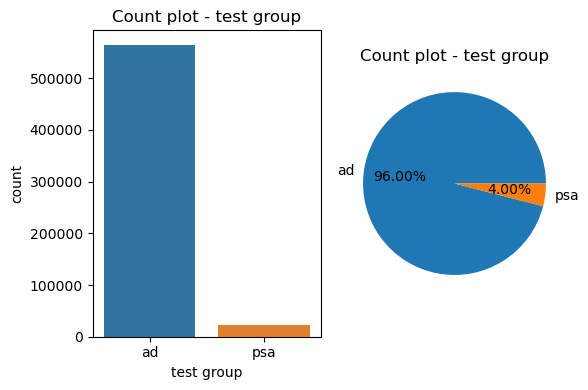

In [60]:

Variable='test group'

plt.figure(figsize=(6,4))
#Count plot
plt.subplot(1,2,1)
sns.countplot(x=Variable,data=data_cate)
plt.title(f'Count plot - {Variable}')

#pie chart
plt.subplot(1,2,2)
counts=data_cate[Variable].value_counts()
plt.pie(counts, labels=counts.index,autopct='%0.2f%%')
plt.title(f'Count plot - {Variable}')

#Adjust layout
plt.tight_layout()

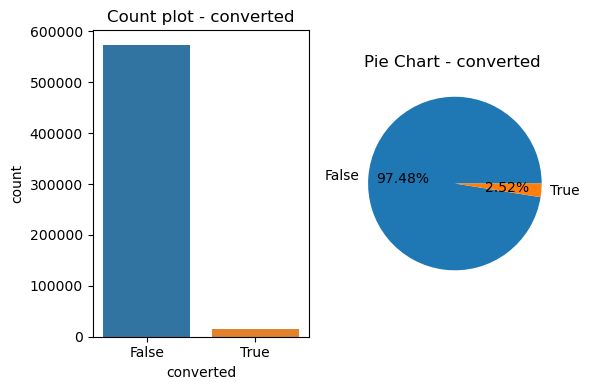

In [43]:

Variable = 'converted'

plt.figure(figsize = (6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=Variable,data=data_cate)
plt.title(f'Count plot - {Variable}')

#pie chart
plt.subplot(1,2,2)
counts=data_cate[Variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {Variable} ')

#adjust layout
plt.tight_layout()

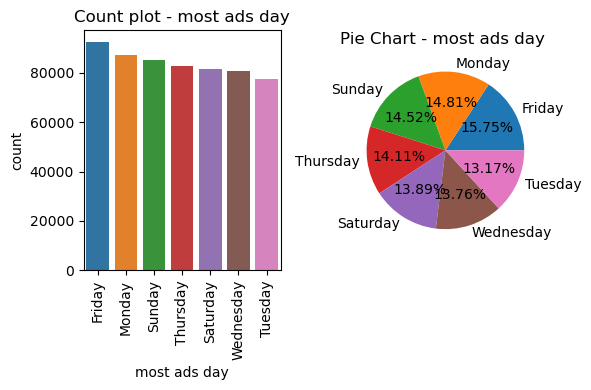

In [44]:
Variable = 'most ads day'

plt.figure(figsize = (6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=Variable,data=data_cate , order=data_cate['most ads day'].value_counts().index)
plt.title(f'Count plot - {Variable}')
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts=data_cate[Variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {Variable} ')

#adjust layout
plt.tight_layout()
     

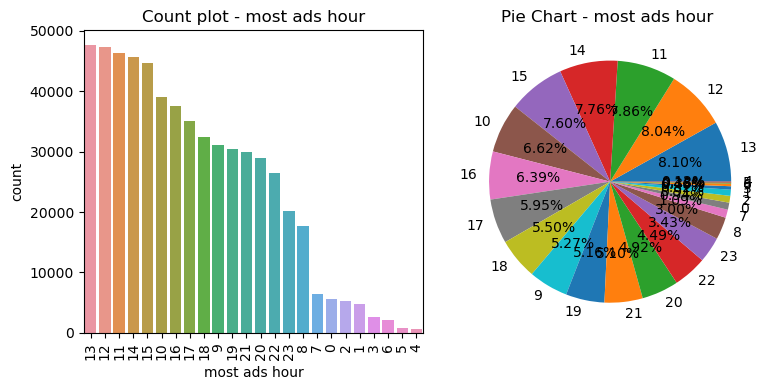

In [45]:

Variable = 'most ads hour'

plt.figure(figsize = (8,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=Variable,data=data_cate , order=data_cate['most ads hour'].value_counts().index)
plt.title(f'Count plot - {Variable}')
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts=data_cate[Variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {Variable} ')

#adjust layout
plt.tight_layout()

In [47]:
data['total ads'].describe()

count    588101.000000
mean         24.820271
std          43.708366
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

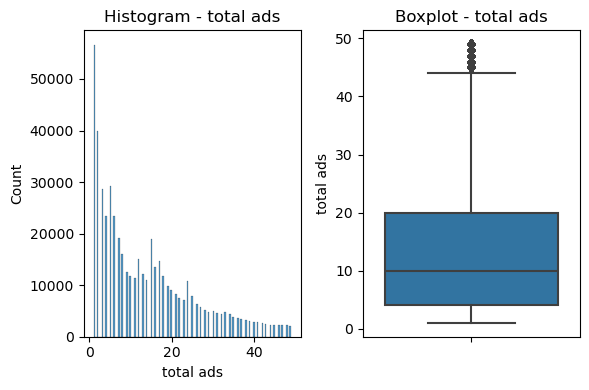

In [48]:
Variable='total ads'

plt.figure(figsize=(6, 4))
#Histogram
plt.subplot(1,2,1)
sns.histplot(x=Variable,data=data[data['total ads']<50])
plt.title(f'Histogram - {Variable}')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=Variable,data=data[data['total ads']<50])
plt.title(f'Boxplot - {Variable}')

#Adjust layout
plt.tight_layout()

In [49]:
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [50]:
ct_conversion_test_group=pd.crosstab(data['test group'],data['converted'],normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


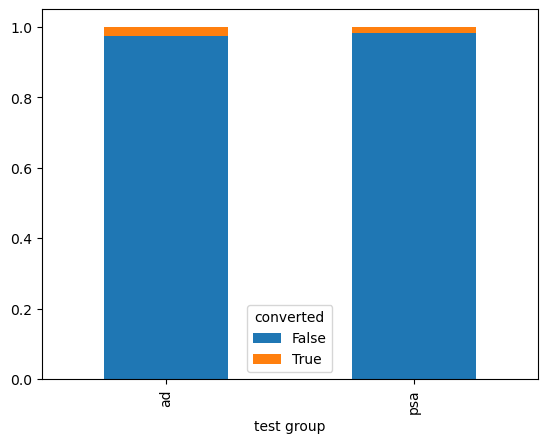

In [52]:
ct_conversion_test_group.plot.bar(stacked=True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


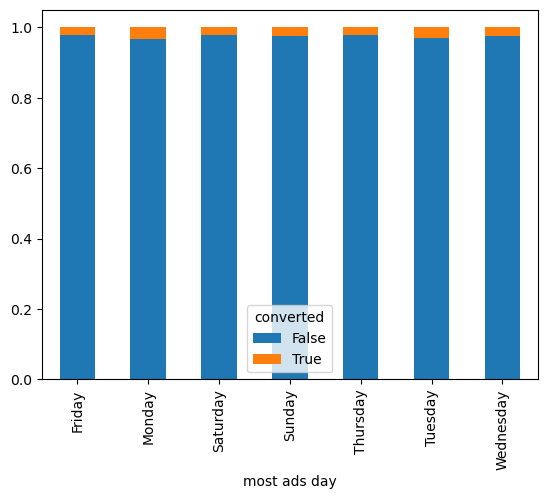

In [53]:
ct_conversion_day=pd.crosstab(data['most ads day'],data['converted'],normalize='index')
print(ct_conversion_day.sort_values(by=True,ascending=False))
ct_conversion_day.plot.bar(stacked=True);

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


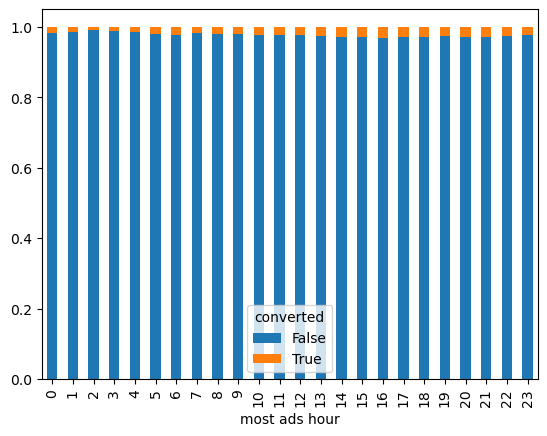

In [54]:
ct_conversion_hour=pd.crosstab(data['most ads hour'],data['converted'],normalize='index')
print(ct_conversion_hour.sort_values(by=True,ascending=False))
ct_conversion_hour.plot.bar(stacked=True);

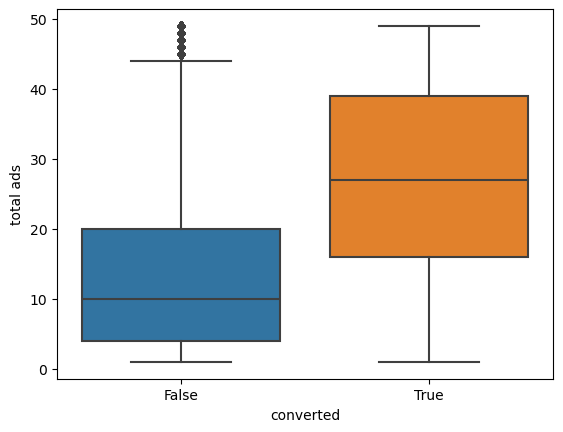

In [56]:

sns.boxplot(x='converted',y='total ads',data=data[data['total ads']<50]);